In [1]:
%matplotlib inline
from matplotlib import pyplot as plt, cm
from scipy.spatial import distance as dist
import numpy as np
import glob
import cv2

In [2]:
# cv2.cv.CV_COMP_CORREL: Computes the correlation between the two histograms.
# cv2.cv.CV_COMP_CHISQR: Applies the Chi-Squared distance to the histograms.
# cv2.cv.CV_COMP_INTERSECT: Calculates the intersection between two histograms.
# cv2.cv.CV_COMP_BHATTACHARYYA: Bhattacharyya distance, used to measure the “overlap” between the two histograms.
# cv2.cv.CV_COMP_HELLINGER: A synonym for cv2.cv.CV_COMP_BHATTACHARYYA. I tend to use this synonym over Bhattacharyya, 
# simply because I find it so hard to consistently spell Bhattacharyya.

In [9]:
# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}

# loop over the image paths
for imagePath in glob.glob("./data/jpg/*.jpg"):
	# extract the image filename (assumed to be unique) and
	# load the image, updating the images dictionary
	filename = imagePath[imagePath.rfind("/") + 1:]
	image = cv2.imread(imagePath)
	images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
	# extract a 3D RGB color histogram from the image,
	# using 8 bins per channel, normalize, and update
	# the index
	hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
	hist = cv2.normalize(hist).flatten()
	index[filename] = hist

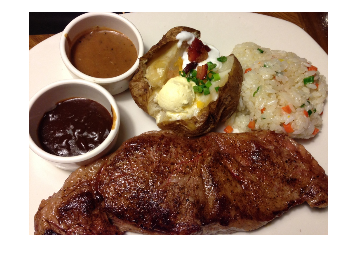

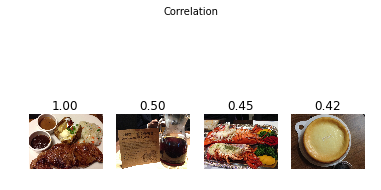

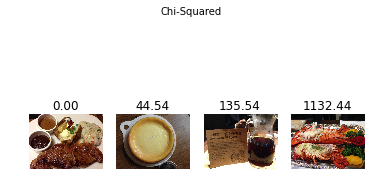

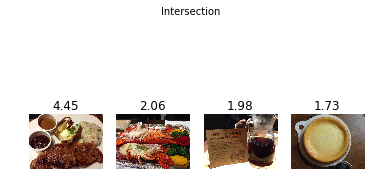

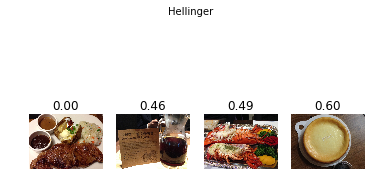

In [16]:
# METHOD #1: UTILIZING OPENCV
# initialize OpenCV methods for histogram comparison
OPENCV_METHODS = (
	("Correlation", cv2.cv.CV_COMP_CORREL),
	("Chi-Squared", cv2.cv.CV_COMP_CHISQR),
	("Intersection", cv2.cv.CV_COMP_INTERSECT), 
	("Hellinger", cv2.cv.CV_COMP_BHATTACHARYYA))
 
# loop over the comparison methods
for (methodName, method) in OPENCV_METHODS:
	# initialize the results dictionary and the sort
	# direction
	results = {}
	reverse = False
 
	# if we are using the correlation or intersection
	# method, then sort the results in reverse order
	if methodName in ("Correlation", "Intersection"):
		reverse = True

	for (k, hist) in index.items():
		# compute the distance between the two histograms
		# using the method and update the results dictionary
		d = cv2.compareHist(index["IMG_3608_1024.jpg"], hist, method)
		results[k] = d
 
	# sort the results
	results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
    
	# show the query image
	fig = plt.figure("Query")
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(images["IMG_3608_1024.jpg"])
	plt.axis("off")
 
	# initialize the results figure
	fig = plt.figure("Results: %s" % (methodName))
	fig.suptitle(methodName, fontsize = 10)
 
	# loop over the results
	for (i, (v, k)) in enumerate(results):
		# show the result
		ax = fig.add_subplot(1, len(images), i + 1)
# 		ax.set_title("%s: %.2f" % (k, v))
		ax.set_title("%.2f" % (v))
		plt.imshow(images[k])
		plt.axis("off")

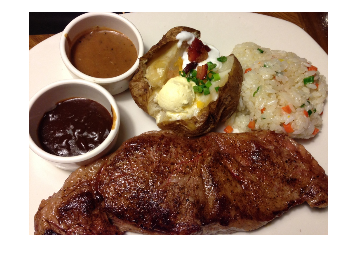

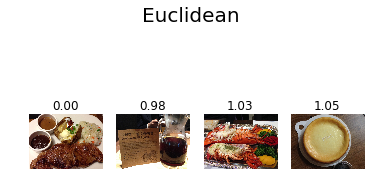

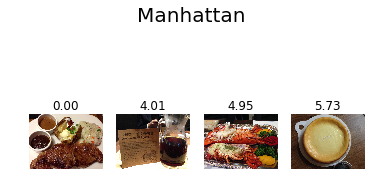

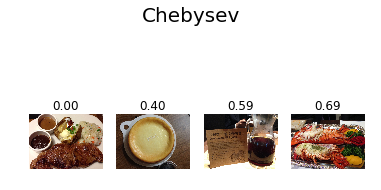

In [17]:
# METHOD #2: UTILIZING SCIPY
# initialize the scipy methods to compaute distances
SCIPY_METHODS = (
	("Euclidean", dist.euclidean),
	("Manhattan", dist.cityblock),
	("Chebysev", dist.chebyshev))
 
# loop over the comparison methods
for (methodName, method) in SCIPY_METHODS:
	# initialize the dictionary dictionary
	results = {}
 
	# loop over the index
	for (k, hist) in index.items():
		# compute the distance between the two histograms
		# using the method and update the results dictionary
		d = method(index["IMG_3608_1024.jpg"], hist)
		results[k] = d
 
	# sort the results
	results = sorted([(v, k) for (k, v) in results.items()])
 
	# show the query image
	fig = plt.figure("Query")
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(images["IMG_3608_1024.jpg"])
	plt.axis("off")
 
	# initialize the results figure
	fig = plt.figure("Results: %s" % (methodName))
	fig.suptitle(methodName, fontsize = 20)
 
	# loop over the results
	for (i, (v, k)) in enumerate(results):
		# show the result
		ax = fig.add_subplot(1, len(images), i + 1)
		ax.set_title("%.2f" % (v))
		plt.imshow(images[k])
		plt.axis("off")

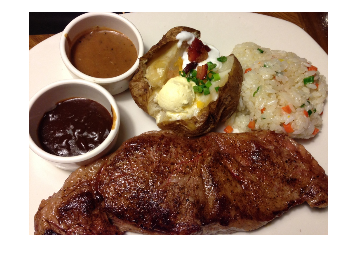

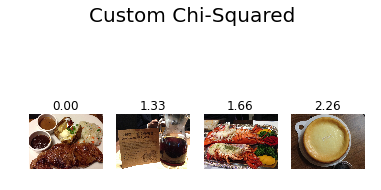

In [18]:
# METHOD #3: ROLL YOUR OWN
def chi2_distance(histA, histB, eps = 1e-10):
	# compute the chi-squared distance
	d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
		for (a, b) in zip(histA, histB)])
 
	# return the chi-squared distance
	return d

# initialize the results dictionary
results = {}
 
# loop over the index
for (k, hist) in index.items():
	# compute the distance between the two histograms
	# using the custom chi-squared method, then update
	# the results dictionary
	d = chi2_distance(index["IMG_3608_1024.jpg"], hist)
	results[k] = d
 
# sort the results
results = sorted([(v, k) for (k, v) in results.items()])
 
# show the query image
fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images["IMG_3608_1024.jpg"])
plt.axis("off")
 
# initialize the results figure
fig = plt.figure("Results: Custom Chi-Squared")
fig.suptitle("Custom Chi-Squared", fontsize = 20)
 
# loop over the results
for (i, (v, k)) in enumerate(results):
	# show the result
	ax = fig.add_subplot(1, len(images), i + 1)
	ax.set_title("%.2f" % (v))
	plt.imshow(images[k])
	plt.axis("off")
 
# show the custom method
plt.show()